In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FindAreaSSE import display_visualisation, find_use_stations
import os

In [ ]:
tremor_df_raw = pd.read_csv("sloweq.19980101.8036.194357481.csv")

x = pd.to_datetime(dict(year=tremor_df_raw.year, month=tremor_df_raw.month, day=tremor_df_raw.day))
tremor_df_raw['date'] = x
tremor_df = tremor_df_raw[['date', 'lat', 'lon']]

counts = tremor_df['date'].value_counts()
dates = tremor_df['date'].value_counts().index.tolist()
list_of_tuples = list(zip(dates, counts))
new_df = pd.DataFrame(list_of_tuples, columns=['dates', 'counts'])
new_df.set_index('dates', inplace=True)
plt.bar(new_df.index, counts)

In [2]:
# load tremor data in
tremor_df_raw = pd.read_csv("sloweq.19980101.8036.194357481.csv")
tremor_df_raw

,year,month,day,hour,min,sec,lat,lon,dep,mag,catalog,ref,udate
0,2017,5,4,15,,,33.2958,132.15221,,,NIED-Tremor,Obara et al. (2010),2022-03-23
1,2017,5,4,12,,,33.2878,132.13940,,,NIED-Tremor,Obara et al. (2010),2022-03-23
2,2017,5,4,12,,,34.7548,136.43739,,,NIED-Tremor,Obara et al. (2010),2022-03-23
3,2017,5,4,7,,,34.7048,136.32809,,,NIED-Tremor,Obara et al. (2010),2022-03-23
4,2017,5,4,4,,,34.7486,136.41840,,,NIED-Tremor,Obara et al. (2010),2022-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2020,1,1,16,,,34.0554,133.68460,,,NIED-Tremor,Obara et al. (2010),2022-03-23
34014,2020,1,1,17,,,34.1076,133.84210,,,NIED-Tremor,Obara et al. (2010),2022-03-23
34015,2020,1,1,21,,,34.0495,133.96870,,,NIED-Tremor,Obara et al. (2010),2022-03-23
34016,2020,1,1,22,,,34.0314,133.69550,,,NIED-Tremor,Obara et al. (2010),2022-03-23


In [3]:
x = pd.to_datetime(dict(year=tremor_df_raw.year, month=tremor_df_raw.month, day=tremor_df_raw.day))
tremor_df_raw['date'] = x
tremor_df = tremor_df_raw[['date', 'lat', 'lon']]
tremor_df

,date,lat,lon
0,2017-05-04,33.2958,132.15221
1,2017-05-04,33.2878,132.13940
2,2017-05-04,34.7548,136.43739
3,2017-05-04,34.7048,136.32809
4,2017-05-04,34.7486,136.41840
...,...,...,...
34013,2020-01-01,34.0554,133.68460
34014,2020-01-01,34.1076,133.84210
34015,2020-01-01,34.0495,133.96870
34016,2020-01-01,34.0314,133.69550


<BarContainer object of 4884 artists>

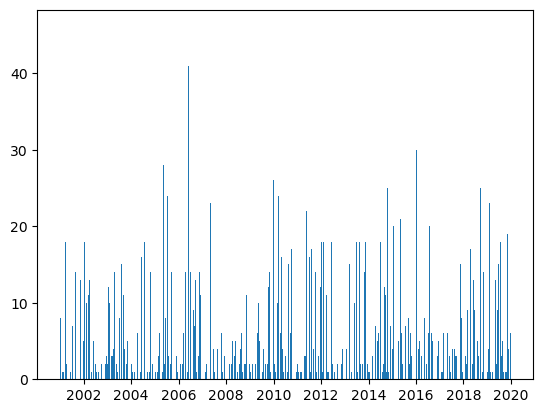

In [13]:
counts = tremor_df['date'].value_counts()
dates = tremor_df['date'].value_counts().index.tolist()
list_of_tuples = list(zip(dates, counts))
new_df = pd.DataFrame(list_of_tuples, columns=['dates', 'counts'])
new_df.set_index('dates', inplace=True)
plt.bar(new_df.index, counts)

In [5]:
stations_cord_df = pd.read_csv("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/clean_raw_data/stations_cords", dtype={'station':str})
# stations_cord_df['station'] = stations_cord_df['station'].astype(str)

stations_cord_df['station']

0      950291
1      950391
2      940062
3      950283
4      940070
        ...  
190    950286
191    940067
192    950394
193    950294
194    093078
Name: station, Length: 195, dtype: object

In [6]:
# selected_stations = ['950421', '950440', '950441', '950424', '950420', '950423', '950422', '950416', '950418', '950415'] # Area-3
selected_stations = ['940086', '950434' ,'950433' ,'950436' ,'950437' ,'950448' ,'950449' ,'940085' ,'940084' ,'950443'] # Area-1
# selected_stations = ['950304', '950302', '950306', '950301', '950303', '093102', '093103', '093099', '093050', '093104'] # Area-2
s_stations_cord = []


for name_string in selected_stations:
#     # print(name_string)
    s_stations_cord.append(stations_cord_df[stations_cord_df.station==name_string].iloc[0])

s_stations_corddf = pd.DataFrame(s_stations_cord)
filtered_tremors = find_use_stations(s_stations_corddf, tremor_df, rad=0.5)

In [7]:
filtered_tremors_df = pd.DataFrame(filtered_tremors)
filtered_tremors_df

,date,lat,lon
0,2017-05-04,33.2958,132.15221
1,2017-05-04,33.2878,132.13940
7,2017-05-04,33.2271,132.12199
9,2017-05-04,33.2270,132.09410
12,2017-05-04,33.2366,132.03419
...,...,...,...
33999,2019-12-31,33.1524,132.05440
34000,2019-12-31,33.7085,132.82930
34002,2019-12-31,33.6692,132.41750
34003,2019-12-31,33.6583,132.87610


In [12]:
counts = filtered_tremors_df['date'].value_counts()
dates = filtered_tremors_df['date'].value_counts().index.tolist()
list_of_tuples = list(zip(dates, counts))
new_df = pd.DataFrame(list_of_tuples, columns=['dates', 'counts'])
new_df.set_index('dates', inplace=True)
new_df
# plt.bar(new_df.index, counts)

,counts
dates,
2014-10-19,29
2001-08-19,29
2011-08-14,27
2012-06-01,26
2017-09-10,26
...,...
2013-10-04,1
2013-09-29,1
2005-04-30,1


In [9]:
# Choose directory
directory_name = "/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/japan_data/japanGNSS"

files = os.listdir(directory_name)

# Process data
GNSSdata = []
stationnames = []

# data range to be used
dates = pd.date_range('1996-12-12', '2020-01-01')

stationsprocessed = 0
for filename in files:
    if filename.endswith(".res"):
        if filename.startswith("._"):
            continue
        # read in file
        path = os.path.join(directory_name, filename)
        GNSSdataframe = pd.read_csv(path, delim_whitespace=True, header=None)

        # parse data
        GNSSdataframe.columns = ["date", "NS_displacement", "EW_displacement", "UD_displacement", "Length_change"]
        GNSSdataframe = GNSSdataframe.drop(columns=["Length_change"])
        GNSSdataframe["date"] = pd.to_datetime(GNSSdataframe["date"])
        GNSSdataframe = GNSSdataframe.set_index("date")

        # Remove double up indexes
        GNSSdataframe = GNSSdataframe.loc[~GNSSdataframe.index.duplicated(), :]

        # reindex to desired time period
        idx = pd.DatetimeIndex(dates)
        GNSSdataframe = GNSSdataframe.reindex(idx)

        # if the number of days missing is too large then drop
        missingdays = GNSSdataframe.shape[0] - GNSSdataframe.dropna().shape[0]
        if missingdays < 200:
            p = GNSSdataframe.interpolate()
            nullremaining = p.shape[0] - p.dropna().shape[0]
            if nullremaining == 0:
                stationsprocessed = stationsprocessed+1
                splitted = filename.split(".")
                stationnames.append(splitted[0])
                GNSSdata.append(p)

print("Stations in array: ", stationsprocessed)

Stations in array:  195


In [206]:
knownSSE = pd.read_csv("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/japan_data/Nishimura/Nishimura2013.csv")
knownSSE = knownSSE[['date', 'lat', 'lon']]
sortedSSE = knownSSE.sort_values(by="date").drop_duplicates().reset_index(drop=True)

startdate = sortedSSE.iloc[0]['date']
enddate = sortedSSE.iloc[sortedSSE.shape[0]-1]['date']
print("Known SSE start date: ", startdate)
print("Known SSE end date: ", enddate)
print("Numbers of SSE: ", sortedSSE.shape[0])

Known SSE start date:  1996-09-18
Known SSE end date:  2012-01-02
Numbers of SSE:  158


In [207]:
selected_sses = find_use_stations(s_stations_corddf, sortedSSE, rad=0.5)
selected_sses


[date    1996-09-18
 lat         33.722
 lon        133.133
 Name: 0, dtype: object,
 date    1997-03-20
 lat         33.674
 lon      133.23599
 Name: 3, dtype: object,
 date    1997-09-11
 lat          33.28
 lon      132.97099
 Name: 6, dtype: object,
 date    1998-01-23
 lat         33.527
 lon      132.66499
 Name: 12, dtype: object,
 date    1998-05-07
 lat         33.642
 lon        133.265
 Name: 15, dtype: object,
 date    1998-10-02
 lat         33.763
 lon        133.424
 Name: 18, dtype: object,
 date    1998-11-07
 lat         33.448
 lon        132.653
 Name: 19, dtype: object,
 date    1999-05-05
 lat          33.51
 lon      133.30901
 Name: 22, dtype: object,
 date    1999-08-19
 lat         33.801
 lon        132.894
 Name: 24, dtype: object,
 date    1999-09-09
 lat         33.648
 lon        132.939
 Name: 25, dtype: object,
 date    2000-02-14
 lat         33.661
 lon        133.422
 Name: 30, dtype: object,
 date    2000-10-03
 lat         33.703
 lon        133.5

In [10]:
new_df.to_csv("area1-filtered-tremor.csv")

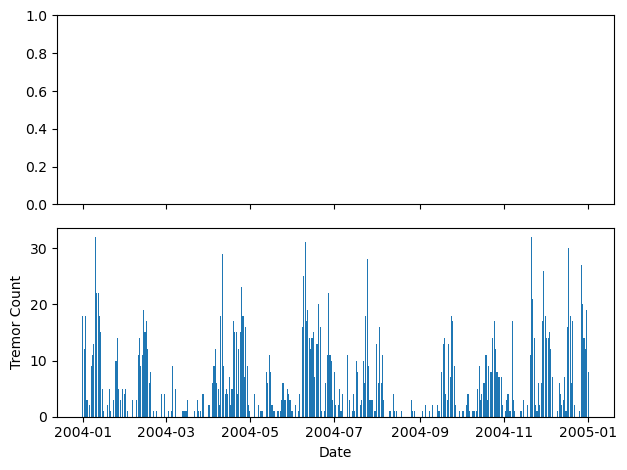

In [16]:
start_raw = '2004-01-01'
end_raw = '2005-01-01'
start = pd.to_datetime(start_raw)
end = pd.to_datetime(end_raw)

fig, ax = plt.subplots(2,1, sharex='all')
# station950437 = GNSSdata[stationnames.index('950433')].loc[start:end]
# ax[0].plot(station950437)
# for x in selected_sses:
#     pandas_date = pd.to_datetime(x['date'])
#     if (pandas_date > start) and (pandas_date <= end):
#     # print(x['date'])
#     # if pd.to_datetime(start) < pd.to_datetime(x['date']) and pd.to_datetime(x['date']) < pd.to_datetime(end):
#         ax[0].axvline(pandas_date, linewidth=2, color='r')
# ax[0].set_ylabel("Displacement (mm)")
# ax[0].set_title("GNSS station and Tremor Comparison")
# ax[0].legend(['NS', 'EW', 'UD', 'SSE'])
# ax[0].axvline(pd.to_datetime('2003-09-25'), linewidth=2, color='r')

trem_df = new_df.loc[start_raw:end_raw]
ax[1].bar(trem_df.index, trem_df['counts'])
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Tremor Count")
# ax[1].tick_params(labelrotation=)
fig.tight_layout()
fig.savefig("tremor_example.pdf")


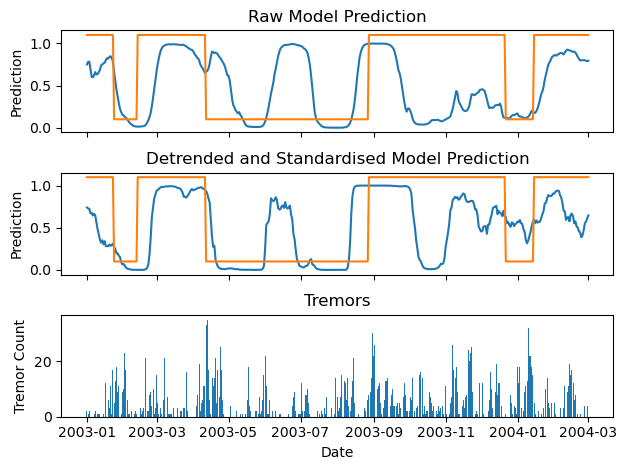

In [34]:
fig, ax = plt.subplots(3,1, sharex='all')

start_raw = '2003-01-01'
end_raw = '2004-03-01'

raw_data_second = pd.read_csv("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/cross_model_loading/dataframe_csvs/second-raw.csv")
raw_data_second['date'] = pd.to_datetime(raw_data_second['date'])
raw_data_second.set_index('date', inplace=True)
r_d_s_filtered = raw_data_second.loc[start_raw:end_raw]
ax[0].plot(r_d_s_filtered['probs'])
ax[0].plot(r_d_s_filtered['actual'])
ax[0].set_title("Raw Model Prediction")
ax[0].set_ylabel("Prediction")

dtsd_data_second = pd.read_csv("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/cross_model_loading/dataframe_csvs/second-dt-sd.csv")
dtsd_data_second['date'] = pd.to_datetime(dtsd_data_second['date'])
dtsd_data_second.set_index('date', inplace=True)
dtsd_d_s_filtered = dtsd_data_second[start_raw:end_raw]
ax[1].plot(dtsd_d_s_filtered['probs'])
ax[1].plot(dtsd_d_s_filtered['actual'])
ax[1].set_title("Detrended and Standardised Model Prediction")
ax[1].set_ylabel("Prediction")

trem_df = new_df.loc[start_raw:end_raw]
ax[2].bar(trem_df.index, trem_df['counts'])
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Tremor Count")
ax[2].set_title("Tremors")
# ax[1].tick_params(labelrotation=)
fig.tight_layout()
# fig.savefig("area1tremorcomparison.pdf")

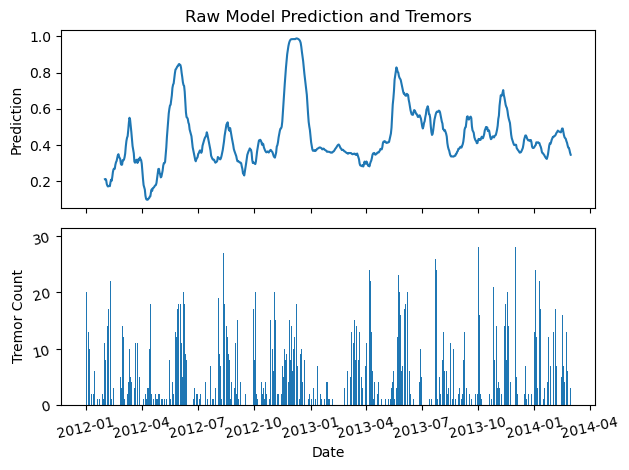

In [56]:
fig, ax = plt.subplots(2,1, sharex='all')

start_raw = '2012-01-01'
end_raw = '2014-03-01'

raw_data_second = pd.read_csv("/Users/haxby/Desktop/Earthquakes/gnss-sse-detection-main/cross_model_loading/final_prediction_df.csv")
raw_data_second['date'] = pd.to_datetime(raw_data_second['date'])
raw_data_second.set_index('date', inplace=True)
r_d_s_filtered = raw_data_second.loc[start_raw:end_raw]
ax[0].plot(r_d_s_filtered['probs'])
# ax[0].plot(r_d_s_filtered['actual'])
ax[0].set_title("Raw Model Prediction and Tremors")
ax[0].set_ylabel("Prediction")

# raw_data_second
# r_d_s_filtered

trem_df = new_df.loc[start_raw:end_raw]
ax[1].bar(trem_df.index, trem_df['counts'])
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Tremor Count")
# ax[1].set_title("Tremors")
ax[1].tick_params(labelrotation=12)
fig.tight_layout()
fig.savefig("area1-20122014-prediction.pdf")